<a href="https://colab.research.google.com/github/TZanarkand/Disney-Movies/blob/main/Disney_Movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Disney Movies Analysis

## import

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## import Dataset from Github


In [ ]:
url = "https://raw.githubusercontent.com/TZanarkand/Project_DA/refs/heads/main/disney_movies.csv"
df = pd.read_csv(url)

## EDA

In [ ]:
df.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730


In [ ]:
# this dataset have 579 records and 6 columns
# "genre" and "mpaa_rating" have some missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   movie_title               579 non-null    object
 1   release_date              579 non-null    object
 2   genre                     562 non-null    object
 3   mpaa_rating               523 non-null    object
 4   total_gross               579 non-null    int64 
 5   inflation_adjusted_gross  579 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 27.3+ KB


### Clean Data

In [ ]:
df.isnull().sum()

,0
movie_title,0
release_date,0
genre,17
mpaa_rating,56
total_gross,0
inflation_adjusted_gross,0


In [ ]:
df['genre'].unique()

array(['Musical', 'Adventure', 'Drama', 'Comedy', nan, 'Action', 'Horror',
       'Romantic Comedy', 'Thriller/Suspense', 'Western', 'Black Comedy',
       'Documentary', 'Concert/Performance'], dtype=object)

In [ ]:
df['mpaa_rating'].unique()

array(['G', nan, 'Not Rated', 'PG', 'R', 'PG-13'], dtype=object)

In [ ]:
# เราจะ drop data แค่ส่วนของ "genre" แต่ไม่ drop "mpaa_rating"
# เนื่องจาก เราไม่ได้วิเคราะห์ในส่วน "mpaa_rating" หากทำการตัดไปจะเสีย data ไปหลาย records
df3 = df.dropna(subset=['genre'])

In [ ]:
df.dropna(subset=['genre'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 562 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   movie_title               562 non-null    object
 1   release_date              562 non-null    object
 2   genre                     562 non-null    object
 3   mpaa_rating               513 non-null    object
 4   total_gross               562 non-null    int64 
 5   inflation_adjusted_gross  562 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 30.7+ KB


### Data Preparation

In [ ]:
# ดึงเฉพาะ 'year' ออกมา แล้วทำการสร้าง column 'release_year' เพิ่มขึ้นมา
df['release_year'] = pd.DatetimeIndex(df['release_date']).year

df

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,release_year
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,1937
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052,1940
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808,1940
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579,1946
4,Cinderella,1950-02-15,Drama,G,85000000,920608730,1950
...,...,...,...,...,...,...,...
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979,12545979,2016
575,Queen of Katwe,2016-09-23,Drama,PG,8874389,8874389,2016
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923,232532923,2016
577,Moana,2016-11-23,Adventure,PG,246082029,246082029,2016


## Result

### Top 10 highest-grossing movies

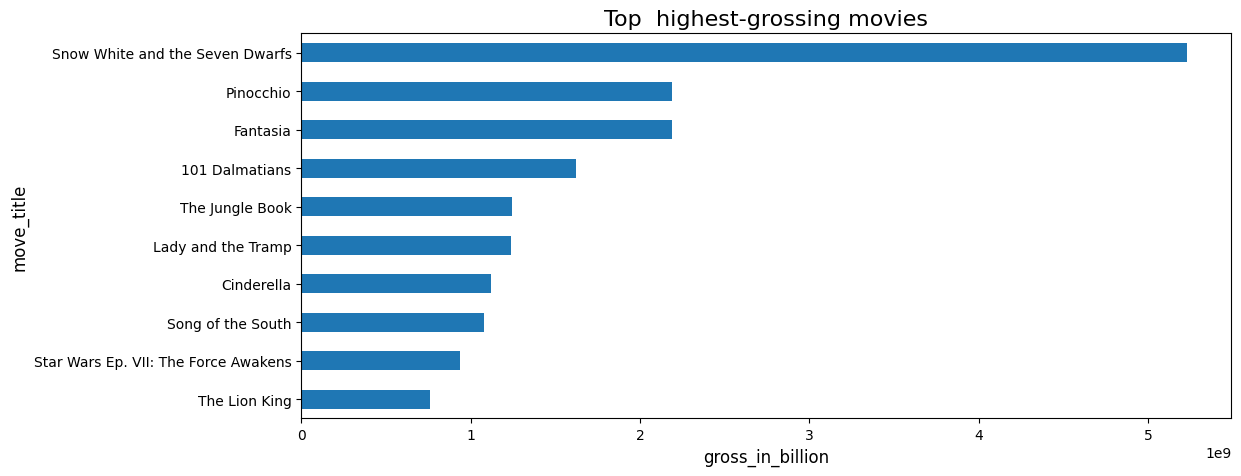

In [ ]:
# top 10 หนังที่ทำรายได้มากที่สุด
plt.figure(figsize=(12,5))

df1 = df.groupby('movie_title')['inflation_adjusted_gross'].sum()
df1 = df1.sort_values(ascending=True).tail(10)

# bar chart แบบแนวนอนใช้ 'barh'
df1.plot(kind='barh')

plt.title('Top  highest-grossing movies', fontsize=16)
plt.xlabel('gross_in_billion', fontsize=12)
plt.ylabel('move_title', fontsize=12)

plt.show()

### Top 10 years with the highest movie grossing

In [ ]:
df2 = df.groupby('release_year')['inflation_adjusted_gross'].sum() \
    .sort_values(ascending=True).head(10)

df2.tail(10)

,inflation_adjusted_gross
release_year,
1959,21505832
1971,91305448
1983,100549534
1962,109581646
1982,110731153
1975,131246872
1981,133118889
1968,138612686
1963,153870834


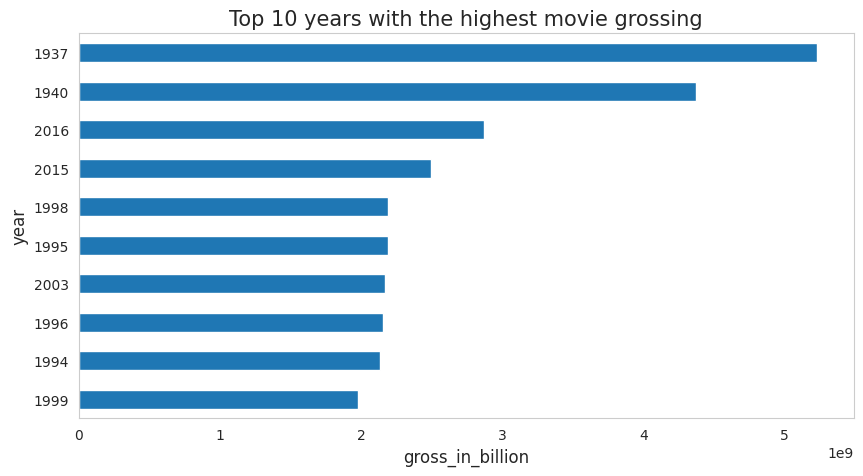

In [ ]:
# 10 อันดับ ช่วงปีที่ทำรายได้จากหนังมากที่สุด
plt.figure(figsize=(10,5))

df2 = df.groupby('release_year')['inflation_adjusted_gross'].sum() \
    .sort_values(ascending=True).tail(10)

sns.set_style("whitegrid", {'grid.linestyle':''})

df2.plot(kind='barh')

plt.title('Top 10 years with the highest movie grossing', fontsize=15)
plt.xlabel('gross_in_billion', fontsize=12)
plt.ylabel('year', fontsize=12)

plt.show()

### Average grossing by year

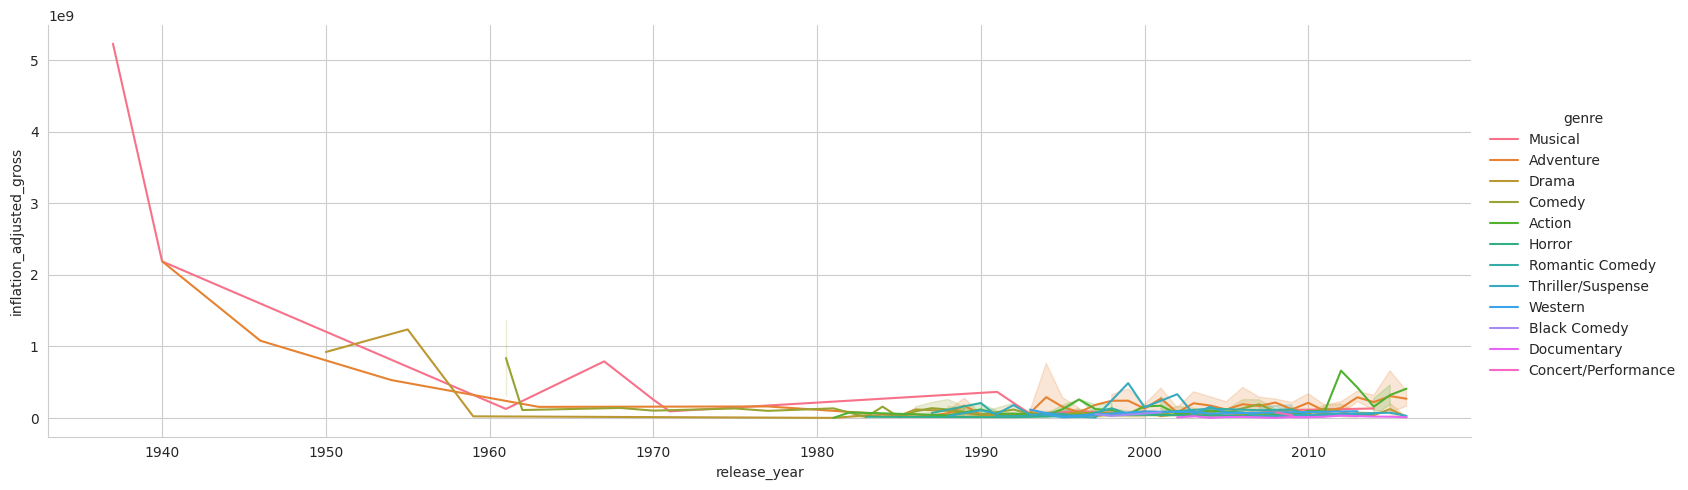

In [ ]:
# ค่าเฉลี่ยรายได้ของหนังในแต่ละปี

sns.set_style("whitegrid")
sns.relplot(kind='line', x='release_year', y='inflation_adjusted_gross', hue='genre', data=df, height=5, aspect=3)